In [1]:
import sys
import os
import json
import glob
import h5py

import numpy as np
import scipy.signal
import scipy.io.wavfile
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import IPython.display as ipd

import importlib

sys.path.append('/om2/user/msaddler/python-packages/bez2018model')
import bez2018model
importlib.reload(bez2018model)

sys.path.append('assets_psychophysics')
import util_figures
importlib.reload(util_figures)
import util_figures_stimuli
importlib.reload(util_figures_stimuli)

sys.path.append('assets_datasets')
import stimuli_util
importlib.reload(stimuli_util)


<module 'stimuli_util' from 'assets_datasets/stimuli_util.py'>

In [2]:
kwargs_nervegram_meanrates = {
    'meanrates_params': {
        'dur': 0.050,
        'fs':20e3,
        'buffer_start_dur': 0.07,
        'buffer_end_dur': 0.01,
    },
    'ANmodel_params': {
        'num_cfs': 100,
        'min_cf':125,
        'max_cf':14e3,
        'spont_list':[70.0],
        'cohc':1.0,
        'bandwidth_scale_factor':1.0,
        'IhcLowPass_cutoff': 3000.0,
        'IhcLowPass_order': 7,
    },
}


sr = 32000
t = np.arange(0, 0.150, 1/sr)
signal = np.zeros_like(t)
noise = np.random.randn(signal.shape[0])
f0 = 200
phase_mode = 'sine'
spectral_region = 'none'

freq_list = f0*np.arange(1, 60)

if phase_mode == 'alt':
    phase_list = np.pi/2 * np.ones(len(freq_list))
    phase_list[::2] = 0
else:
    phase_list = np.zeros(len(freq_list))

for freq, phase in zip(freq_list, phase_list):
    if freq < sr/2:
        signal = signal + np.sin(2*np.pi*freq*t + phase)

snr = 12
dBSPL = 60
noise = np.random.randn(noise.shape[0])

y = stimuli_util.combine_signal_and_noise(signal, noise, snr=snr,
                                          rms_out=20e-6*np.power(10, dBSPL/20))
ipd.display(ipd.Audio(y, rate=sr))

out_dict = bez2018model.nervegram_meanrates(y, sr, **kwargs_nervegram_meanrates)



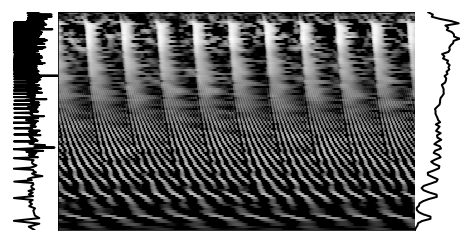

In [5]:
import util_figures
importlib.reload(util_figures)
import util_figures_stimuli
importlib.reload(util_figures_stimuli)

figsize=(8, 4)
nrows=1
ncols=3
gridspec_kw = {
    'wspace': 0.0,
    'hspace': None,
    'width_ratios': [1, 8, 1],
    'height_ratios': [1]*nrows,
}
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, gridspec_kw=gridspec_kw)

util_figures_stimuli.make_nervegram_plot(ax_arr[1],
                                          out_dict['meanrates'],
                                          sr=out_dict['meanrates_fs'],
                                          cfs=out_dict['cf_list'],
                                          str_xlabel=None,
                                          str_ylabel=None,
                                          nxticks=0,
                                          nyticks=0,
                                          str_clabel=None)

spines_to_hide= [
    'left',
    'right',
    'bottom',
    'top'
]
plot_kwargs = {}

x_exc = np.sum(out_dict['meanrates'], axis=1)
y_exc = np.arange(0, out_dict['meanrates'].shape[0])
util_figures_stimuli.make_line_plot(ax_arr[2], x_exc, y_exc,
                                     plot_kwargs=plot_kwargs,
                                     fontsize_title=12,
                                     fontsize_labels=12,
                                     fontsize_legend=12,
                                     fontsize_ticks=12,
                                     fontweight_labels=None,
                                     str_title=None,
                                     str_xlabel=None,
                                     str_ylabel=None,
                                     xlimits=[np.min(x_exc), np.max(x_exc)],
                                     ylimits=[np.min(y_exc), np.max(y_exc)],
                                     xticks=[],
                                     xticklabels=[],
                                     yticks=[],
                                     yticklabels=[],
                                     legend_on=False,
                                     legend_kwargs={},
                                     spines_to_hide=spines_to_hide)




fxx, pxx = stimuli_util.power_spectrum(out_dict['pin'], out_dict['pin_fs'])

IDX = np.logical_and(fxx >= np.min(out_dict['cf_list']),
                     fxx <= np.max(out_dict['cf_list']))
fxx = fxx[IDX]
pxx = pxx[IDX]

x_pxx = pxx
y_pxx = stimuli_util.freq2erb(fxx)
ylimits = [np.min(y_pxx), np.max(y_pxx)]
xlimits = [np.max(x_pxx), np.min(x_pxx)]

util_figures_stimuli.make_line_plot(ax_arr[0], x_pxx, y_pxx,
                                     plot_kwargs=plot_kwargs,
                                     fontsize_title=12,
                                     fontsize_labels=12,
                                     fontsize_legend=12,
                                     fontsize_ticks=12,
                                     fontweight_labels=None,
                                     str_title=None,
                                     str_xlabel=None,
                                     str_ylabel=None,
                                     xlimits=xlimits,
                                     ylimits=ylimits,
                                     xticks=[],
                                     xticklabels=[],
                                     yticks=[],
                                     yticklabels=[],
                                     legend_on=False,
                                     legend_kwargs={},
                                     spines_to_hide=spines_to_hide)

plt.show()



In [ ]:
fontsize=16

yticks = np.array([125, 368, 777, 1467, 2631, 4593, 7901, 14000])
yticks_erb = freq2erb(yticks)

fxx, pxx = dataset_util.power_spectrum(y, sr)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1.5, 6))

ax.plot(pxx, freq2erb(fxx), 'k', lw=1.5)
ax.set_xlim([-5, 40])
ax.set_xticks([])
ax.set_ylim([yticks_erb[0], yticks_erb[-1]])
ax.set_yticks(yticks_erb)
ax.set_yticklabels(yticks, fontsize=fontsize)
ax.set_ylabel('Frequency (Hz)', fontsize=fontsize, fontweight='bold')
ax.set_xlabel('Power', fontsize=fontsize, fontweight='bold')

ax.tick_params(direction='out', axis='both', which='major', length=8, right=True, top=True)
ax.tick_params(direction='out', axis='both', which='minor', length=8, right=True, top=True)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
# ax.spines["left"].set_visible(False)

plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = util_figures_stimuli.make_waveform_plot(ax,
                                             out_dict['pin'],
                                             sr=out_dict['pin_fs'],
                                             fontsize_labels=12,
                                             fontsize_ticks=10,
                                             lw=4.0,
                                             tmin=None,
                                             tmax=None,
                                             treset=True)
